In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# load dataframe
import pandas as pd

# Read the CSV file into a DataFrame
df_raw = pd.read_csv('E:\Landsat_Data_JP_NB\Landsat_OrganicCarbon\Bel_Luxem_SOC.csv')
# Select the first 7 columns
selected_columns_raw = df_raw.columns[:7]
print(selected_columns_raw)


# Step 1: Identify rows where the first 7 columns have zero values
zero_rows = df_raw.iloc[:, :7][(df_raw.iloc[:, :7] == -9999).all(axis=1)]
print(zero_rows)
# Step 2: Remove the identified rows from the dataframe
df_raw = df_raw.drop(zero_rows.index)

# Print the updated dataframe
print(df_raw)

Index(['1', '2', '3', '4', '5', '6', '7'], dtype='object')
Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7]
Index: []
        1      2      3      4      5      6      7    OC
0    8836   8822  10030   8919  22223  13879  10683  74.5
1    8054   8448   9783  10078  15106  12834  10582  10.5
2    8487   8973  10042  10879  13852  14184  11984  11.4
3    8129   8018   8838   7809  17577  11069   9071   9.5
4    8135   8751  10651  11286  14526  13752  11729   8.6
..    ...    ...    ...    ...    ...    ...    ...   ...
87  36169  35526  32214  30591  29794  16163  12790  34.3
88  46145  46872  45489  46009  44835  28438  23096  28.5
89  51334  51347  47970  47527  44733  23508  17690  43.1
90  47724  47416  43897  43134  40413  20228  14994  18.8
91  46676  46869  43136  42643  40585  17515  13238  43.9

[92 rows x 8 columns]


In [3]:
# get hyperspectral bands:
hypbands = []
for col in df_raw.columns:
    try:
        int(col)
    except Exception:
        continue
    hypbands.append(col)

In [4]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df_raw[hypbands], df_raw["OC"],
    test_size=0.3, random_state=42, shuffle=True)

In [5]:
#y_test = y_test.to_frame()
X_train,y_train

(        1      2      3      4      5      6      7
 31  10411   9998  10673  10094  13417  13640  12497
 77   7033   7125   7637   7417  11754   8568   7865
 9    7648   8117   9633   9808  15331  12208  10289
 70   8192   8681  12593  11694  16720  15279  14479
 5    7830   8119   9912   8603  22292  12535   9873
 ..    ...    ...    ...    ...    ...    ...    ...
 20  10012   9898  10544   9525  14690  13257  12507
 60  37678  37397  34854  34636  33715  21827  17720
 71   8165   8634  10115  10795  13638  12971  11200
 14   8501   8439  10051   8791  11930  12881  12177
 51  38731  38414  36138  35957  35129  22331  17830
 
 [64 rows x 7 columns],
 31     11.4
 77    115.9
 9      11.2
 70     10.0
 5      11.7
       ...  
 20     10.9
 60     19.5
 71     22.6
 14     11.4
 51     64.5
 Name: OC, Length: 64, dtype: float64)

In [6]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train= sc.fit_transform(y_train.values.reshape(-1,1))
y_test=sc.fit_transform(y_test.values.reshape(-1,1))

In [7]:
print(X_train,y_train)

[[-0.63577449 -0.67055643 -0.69702598 -0.71640712 -0.83981648 -0.53443343
  -0.38177523]
 [-0.8595492  -0.86066957 -0.91928329 -0.91092779 -0.98621647 -1.31252332
  -1.22441404]
 [-0.81880869 -0.79502661 -0.77316156 -0.73718893 -0.67132003 -0.75411496
  -0.78344762]
 [-0.78277155 -0.7577054  -0.556468   -0.60014523 -0.54904126 -0.28299626
  -0.02121605]
 [-0.80675214 -0.79489426 -0.75273672 -0.82474867 -0.05851763 -0.70395025
  -0.85912503]
 [-0.75673737 -0.72786168 -0.69234072 -0.6106088  -0.7324154  -0.43333697
  -0.40924468]
 [ 1.26008347  1.20066515  1.10175016  1.07838578  0.90016906  0.88812722
   0.77812655]
 [-0.74998041 -0.76313154 -0.76100915 -0.77875256 -0.85231726 -0.70763207
  -0.63573114]
 [-0.79105214 -0.79601919 -0.84065867 -0.83150639 -0.9760926  -0.97977944
  -0.91679267]
 [-0.20697235 -0.27577221 -0.1986308  -0.24314857 -0.2150415   0.22785535
   0.46122741]
 [-0.79125088 -0.78285089 -0.78348378 -0.81704632 -0.43336501 -0.77405812
  -0.89932865]
 [ 2.06508945  2.0425

In [21]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# create PLSRegression model
pls2 = PLSRegression(n_components=5,scale=False,max_iter=50)
 
# fit the model
pls2.fit(X_train, y_train)
 
# predict the values
Y_pred = pls2.predict(X_test)

In [23]:
from sklearn import metrics
import math
import numpy as np

# For Testing Data
rmse2=math.sqrt(metrics.mean_squared_error(y_test,Y_pred))
rsq2=metrics.r2_score(y_test,Y_pred)
print("RMSE:",rmse2)
print("R2:",rsq2)

# Calculate the range of the reference values
range_reference = np.max(y_test) - np.min(y_test)

# Calculate the differences between the predicted and reference values
differences = Y_pred - y_test

# Calculate the standard deviation of the differences
std_deviation = np.std(differences)

# Calculate the RPD
rpd = range_reference / std_deviation

# Print the RPD
print("RPD:", rpd)

RMSE: 0.9788817389024942
R2: 0.04179054124322923
RPD: 5.4940776316831785


In [25]:
lg = LinearRegression()
lg.fit(X_train, y_train)
lg.score(X_test, y_test)
ypred=lg.predict(X_test)
print("RMSE:", math.sqrt(mean_squared_error(y_test, ypred)))
# Calculate the range of the reference values
range_reference = np.max(y_test) - np.min(y_test)

# Calculate the differences between the predicted and reference values
differences = ypred - y_test

# Calculate the standard deviation of the differences
std_deviation = np.std(differences)

# Calculate the RPD
rpd = range_reference / std_deviation

# Print the RPD
print("RPD:", rpd)

RMSE: 0.9740814691559092
RPD: 5.513193555480407


In [22]:
 ############3 SVR After Hyperparameter Tuning ##############333
from sklearn.svm import SVR
from sklearn import *
from math import sqrt

regressor = SVR(kernel = 'rbf',C=0.5,gamma=0.15)

regressor.fit(X_train, y_train)

yfit = regressor.predict(X_test)

score = regressor.score(X_test, y_test)

print("R-squared:", score)
print("RMSE:", math.sqrt(mean_squared_error(y_test, yfit)))

# Calculate the range of the reference values
range_reference = np.max(y_test) - np.min(y_test)

# Calculate the differences between the predicted and reference values
differences = yfit - y_test

# Calculate the standard deviation of the differences
std_deviation = np.std(differences)

# Calculate the RPD
rpd = range_reference / std_deviation

# Print the RPD
print("RPD:", rpd)

R-squared: -0.08348438663856794
RMSE: 1.0409055608644657
RPD: 5.190910670637799


C:\Users\shagu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
########################################## MLP #########################
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(hidden_layer_sizes=(3,2,),activation='relu',max_iter=20000,solver='lbfgs',learning_rate_init=0.05)
nn.fit(X_train,y_train)

C:\Users\shagu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(3, 2), learning_rate_init=0.05, max_iter=20000,
             solver='lbfgs')

In [24]:
mse=metrics.mean_squared_error(y_test,nn.predict(X_test))
rsq=metrics.r2_score(y_test,nn.predict(X_test))
print(math.sqrt(mse),rsq)
# Calculate the range of the reference values
range_reference = np.max(y_test) - np.min(y_test)

# Calculate the differences between the predicted and reference values
differences = nn.predict(X_test) - y_test

# Calculate the standard deviation of the differences
std_deviation = np.std(differences)

# Calculate the RPD
rpd = range_reference / std_deviation

# Print the RPD
print("RPD:", rpd)

0.9543112463457287 0.08929004509806193
RPD: 4.408986759169861


In [25]:
############### Hyperparameter Tuning for MLP #########################3

from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(3,2),(1,2),(3,4)],
    'max_iter': [14000,15000,16000],
    'activation': ["logistic", "tanh", "relu"], 
    'solver': ["lbfgs", "sgd", "adam"],
    'learning_rate': ['constant','adaptive']
}

grid = GridSearchCV(nn, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (3, 2), 'learning_rate': 'adaptive', 'max_iter': 15000, 'solver': 'sgd'}


C:\Users\shagu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
########################################## MLP #########################
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(hidden_layer_sizes=(3,2,),activation='relu',max_iter=15000,solver='sgd',learning_rate_init=0.05)
nn.fit(X_train,y_train)

mse=metrics.mean_squared_error(y_test,nn.predict(X_test))
rsq=metrics.r2_score(y_test,nn.predict(X_test))
print(math.sqrt(mse),rsq)
# Calculate the range of the reference values
range_reference = np.max(y_test) - np.min(y_test)

# Calculate the differences between the predicted and reference values
differences = nn.predict(X_test) - y_test

# Calculate the standard deviation of the differences
std_deviation = np.std(differences)

# Calculate the RPD
rpd = range_reference / std_deviation

# Print the RPD
print("RPD:", rpd)

C:\Users\shagu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9525954117331111 0.09256198154502449
RPD: 4.576191212325706


In [18]:
import numpy as np
rng = np.random.RandomState(0)
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor

krnl = RBF(length_scale=9.0, length_scale_bounds="fixed") 
clf = GaussianProcessRegressor(kernel=krnl,normalize_y=False, random_state=1, alpha=18)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [19]:
from sklearn import metrics
import math
# For Testing Data
rmse=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
rsq=metrics.r2_score(y_test,y_pred)
print("RMSE:",rmse)
print("R2:",rsq)

# Calculate the range of the reference values
range_reference = np.max(y_test) - np.min(y_test)

# Calculate the differences between the predicted and reference values
differences = y_pred - y_test

# Calculate the standard deviation of the differences
std_deviation = np.std(differences)

# Calculate the RPD
rpd = range_reference / std_deviation

# Print the RPD
print("RPD:", rpd)

RMSE: 0.9995553567822545
R2: 0.0008890887278998338
RPD: 5.361512779915789


In [29]:
param_grid = {
    
}
############### Hyperparameter Tuning for GPR #########################3

from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [5,9,15,18,20],   # Length scale of RBF kernel
    
}

grid = GridSearchCV(clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'alpha': 5}


In [9]:
############################ HYBRID MODEL (PLSR AND GPR) ################################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Create and fit the PLSR model
n_components = 5  # You can adjust the number of components as per your requirements
plsr = PLSRegression(n_components=n_components)
plsr.fit(X_train, y_train)

# Step 2: Create and fit the GPR model
kernel = 1.0 * RBF()
# kernel = RBF(length_scale=9.0, length_scale_bounds="fixed") 
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gpr.fit(X_train, y_train)

# Step 3: Make predictions using individual models
y_pred_plsr = plsr.predict(X_test)
y_pred_gpr = gpr.predict(X_test)

# Step 4: Combine predictions using weighted average (hybrid model)
plsr_weight = 0.6  # Adjust the weight based on the performance of individual models
gpr_weight = 1 - plsr_weight
y_pred_hybrid = (plsr_weight * y_pred_plsr) + (gpr_weight * y_pred_gpr)

# Step 5: Evaluate the performance of the hybrid model
mse_hybrid = mean_squared_error(y_test, y_pred_hybrid)
r2_hybrid = r2_score(y_test, y_pred_hybrid)

print("Hybrid Model - Mean Squared Error:", mse_hybrid)
print("Hybrid Model - R-squared:", r2_hybrid)


# Step 1: Calculate RMSE
rmse_hybrid = np.sqrt(mean_squared_error(y_test, y_pred_hybrid))
print("Hybrid Model - RMSE:", rmse_hybrid)

# Step 2: Calculate RPD

# Calculate the range of the reference values
range_reference = np.max(y_test) - np.min(y_test)

# Calculate the differences between the predicted and reference values
differences = y_pred_hybrid - y_test

# Calculate the standard deviation of the differences
std_deviation = np.std(differences)

# Calculate the RPD
rpd_hybrid = range_reference / std_deviation

print("Hybrid Model - RPD:", rpd_hybrid)


Hybrid Model - Mean Squared Error: 0.89056950359446
Hybrid Model - R-squared: 0.10943049640554003
Hybrid Model - RMSE: 0.9436999012368603
Hybrid Model - RPD: 5.683795292243614


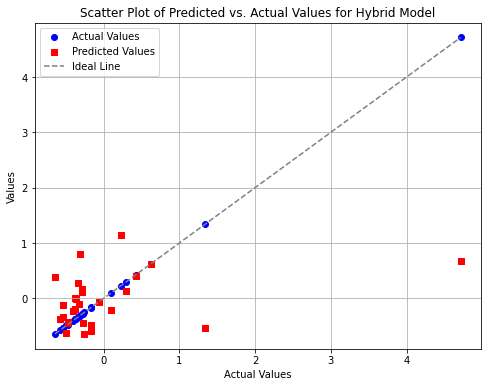

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Replace these arrays with your actual and predicted values from the hybrid model
# actual_values = y_test  # Assuming y_test contains the actual values
# predicted_values = y_pred_hybrid  # Replace with the hybrid model's predicted values

# # Create scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(actual_values, predicted_values, color='blue', label='Predicted vs. Actual')
# plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--', label='Ideal Line')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Scatter Plot of Predicted vs. Actual Values for Hybrid Model')
# plt.legend()
# plt.grid(True)
# plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Replace these arrays with your actual and predicted values from the hybrid model
actual_values = y_test  # Assuming y_test contains the actual values
predicted_values = y_pred_hybrid  # Replace with the hybrid model's predicted values

# Create scatter plot
plt.figure(figsize=(8, 6))

# Plot actual values in blue circles
plt.scatter(actual_values, actual_values, color='blue', marker='o', label='Actual Values')

# Plot predicted values in red squares
plt.scatter(actual_values, predicted_values, color='red', marker='s', label='Predicted Values')

# Plot ideal line
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='gray', linestyle='--', label='Ideal Line')

plt.xlabel('Actual Values')
plt.ylabel('Values')
plt.title('Scatter Plot of Predicted vs. Actual Values for Hybrid Model')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
########################## HYBRID MODEL (PLSR AND MLP) ################################
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score



# Step 2: Create and fit the PLSR model
n_components = 5  # You can adjust the number of components as per your requirements
plsr = PLSRegression(n_components=n_components)
plsr.fit(X_train, y_train)

# Step 3: Dimensionality reduction with PLSR
X_train_plsr = plsr.transform(X_train)
X_test_plsr = plsr.transform(X_test)

# Step 4: Create and train the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(64, activation='relu', input_shape=(n_components,)))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1, activation='linear'))

mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
mlp_model.fit(X_train_plsr, y_train, epochs=100, batch_size=16, verbose=0)

# Step 5: Make predictions using the hybrid model
y_pred_mlp = mlp_model.predict(X_test_plsr).flatten()

# Step 6: Calculate RMSE and R-squared of the hybrid model
rmse_hybrid = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_hybrid = r2_score(y_test, y_pred_mlp)

print("Hybrid Model - RMSE:", rmse_hybrid)
print("Hybrid Model - R-squared:", r2_hybrid)

# Step 2: Calculate RPD

# Calculate the range of the reference values
range_reference = np.max(y_test) - np.min(y_test)

# Calculate the differences between the predicted and reference values
differences = y_pred_mlp - y_test

# Calculate the standard deviation of the differences
std_deviation = np.std(differences)

# Calculate the RPD
rpd_hybrid = range_reference / std_deviation

print("Hybrid Model - RPD:", rpd_hybrid)

1/1 [==============================] - 0s 80ms/step
Hybrid Model - RMSE: 0.8596088144205167
Hybrid Model - R-squared: 0.26107268617055357
Hybrid Model - RPD: 4.675553071377356


In [31]:
###################### HYBRID MODEL (PLSR AND SVR) ################################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Create and train the PLSR model
n_components = 5  # You can adjust the number of components as per your requirements
plsr = PLSRegression(n_components=n_components)
plsr.fit(X_train, y_train)

# Step 2: Transform the data using the PLSR model
X_train_plsr = plsr.transform(X_train)
X_test_plsr = plsr.transform(X_test)

# Step 3: Create and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_plsr, y_train)

# Step 4: Make predictions using the SVR model
y_pred_svr = svr_model.predict(X_test_plsr)

# Step 5: Evaluate the performance of the hybrid model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Model - Mean Squared Error:", mse_svr)
print("SVR Model - R-squared:", r2_svr)

# Step 1: Calculate RMSE
rmse_hybrid = np.sqrt(mse_svr)
print("Hybrid Model - RMSE:", rmse_hybrid)

# Step 2: Calculate RPD

# Calculate the range of the reference values
range_reference = np.max(y_test) - np.min(y_test)

# Calculate the differences between the predicted and reference values
differences = y_pred_mlp - y_test

# Calculate the standard deviation of the differences
std_deviation = np.std(differences)

# Calculate the RPD
rpd_hybrid = range_reference / std_deviation

print("Hybrid Model - RPD:", rpd_hybrid)

SVR Model - Mean Squared Error: 1.0803520279853818
SVR Model - R-squared: -0.08035202798538177
Hybrid Model - RMSE: 1.039399840285432
Hybrid Model - RPD: 4.675553071377356


C:\Users\shagu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Create and train the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Step 2: Create and train the PLSR model
n_components = 5  # You can adjust the number of components as per your requirements
plsr = PLSRegression(n_components=n_components)
plsr.fit(X_train, y_train)

# Step 3: Transform the data using the PLSR model
X_train_plsr = plsr.transform(X_train)
X_test_plsr = plsr.transform(X_test)

# Step 4: Create and train the GPR model
kernel = 1.0 * RBF()
gpr_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr_model.fit(X_train_plsr, y_train)

# Step 5: Make predictions using individual models
y_pred_mlp = mlp_model.predict(X_test)
y_pred_plsr = plsr.predict(X_test)
y_pred_gpr = gpr_model.predict(X_test_plsr)

# # Step 6: Combine predictions using weighted average (hybrid model)
# mlp_weight = 0.4  # Adjust the weight based on the performance of individual models
# plsr_weight = 0.3
# gpr_weight = 0.3
# y_pred_hybrid = (mlp_weight * y_pred_mlp) + (plsr_weight * y_pred_plsr) + (gpr_weight * y_pred_gpr)

# # Step 7: Evaluate the performance of the hybrid model
# mse_hybrid = mean_squared_error(y_test, y_pred_hybrid)
# r2_hybrid = r2_score(y_test, y_pred_hybrid)

# print("Hybrid Model - Mean Squared Error:", mse_hybrid)
# print("Hybrid Model - R-squared:", r2_hybrid)

# Step 6: Use only one output of the hybrid model (e.g., first output)
y_pred_hybrid_single_output = y_pred_hybrid[:, 0]

# Step 7: Evaluate the performance of the hybrid model
mse_hybrid = mean_squared_error(y_test, y_pred_hybrid_single_output)
r2_hybrid = r2_score(y_test, y_pred_hybrid_single_output)

print("Hybrid Model - Mean Squared Error:", mse_hybrid)
print("Hybrid Model - R-squared:", r2_hybrid)

# Step 1: Calculate RMSE
rmse_hybrid = np.sqrt(mse_hybrid)
print("Hybrid Model - RMSE:", rmse_hybrid)

# Step 2: Calculate RPD

# Calculate the range of the reference values
range_reference = np.max(y_test) - np.min(y_test)

# Calculate the differences between the predicted and reference values
differences = y_pred_hybrid_single_output - y_test

# Calculate the standard deviation of the differences
std_deviation = np.std(differences)

# Calculate the RPD
rpd_hybrid = range_reference / std_deviation

print("Hybrid Model - RPD:", rpd_hybrid)





Hybrid Model - Mean Squared Error: 48.0337735809709
Hybrid Model - R-squared: 0.34499801440818834
Hybrid Model - RMSE: 6.930640199936143
Hybrid Model - RPD: 6.696768719915728
